In [1]:
import pandas as pd

df_train = pd.read_csv('train.csv')

df_train.head()

,tweet_id,user_handle,timestamp,tweet_text,candidate,party,retweets,likes,sentiment
0,1,@user123,2024-11-03 08:45:00,Excited to see Kamala Harris leading the Democ...,Kamala Harris,Democratic Party,120,450,positive
1,2,@politicsFan,2024-11-03 09:15:23,Donald Trump's policies are the best for our e...,Donald Trump,Republican Party,85,300,positive
2,3,@greenAdvocate,2024-11-03 10:05:45,Jill Stein's environmental plans are exactly w...,Jill Stein,Green Party,60,200,positive
3,4,@indieVoice,2024-11-03 11:20:10,Robert Kennedy offers a fresh perspective outs...,Robert Kennedy,Independent,40,150,neutral
4,5,@libertyLover,2024-11-03 12:35:55,Chase Oliver's libertarian stance promotes tru...,Chase Oliver,Libertarian Party,30,120,positive


# Checking for missing values

In [3]:
print(df_train.isna().sum())

tweet_id       0
user_handle    0
timestamp      0
tweet_text     0
candidate      0
party          0
retweets       0
likes          0
sentiment      0
dtype: int64


# Checking for duplicates

NO NULL VALUES FOUND

In [6]:
print(df_train.duplicated().sum())
df_train.drop_duplicates(inplace=True)

0


NO DUPLICATES FOUND

# Conversion of categorical sentiment values into numerical values

In [10]:
sentiment_mapping = {'negative': -1, 'neutral': 0, 'positive': 1}
df_train['sentiment'] = df_train['sentiment'].map(sentiment_mapping)

In [11]:
df_train['sentiment'].isna().sum()

1

ONE ROW WASNT MAPPED PROPERLY, DROP IT

In [14]:
df_train.dropna(subset=['sentiment'], inplace=True)

In [15]:
df_train['sentiment'].isna().sum()

0

# Normalizing numerical features

In [17]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_train[['likes', 'retweets']] = scaler.fit_transform(df_train[['likes', 'retweets']])

In [18]:
df_train['timestamp'] = pd.to_datetime(df_train['timestamp'])

In [19]:
df_train

,tweet_id,user_handle,timestamp,tweet_text,candidate,party,retweets,likes,sentiment
0,1,@user123,2024-11-03 08:45:00,Excited to see Kamala Harris leading the Democ...,Kamala Harris,Democratic Party,1.000000,0.879518,1.0
1,2,@politicsFan,2024-11-03 09:15:23,Donald Trump's policies are the best for our e...,Donald Trump,Republican Party,0.656863,0.518072,1.0
2,3,@greenAdvocate,2024-11-03 10:05:45,Jill Stein's environmental plans are exactly w...,Jill Stein,Green Party,0.411765,0.277108,1.0
3,4,@indieVoice,2024-11-03 11:20:10,Robert Kennedy offers a fresh perspective outs...,Robert Kennedy,Independent,0.215686,0.156627,0.0
4,5,@libertyLover,2024-11-03 12:35:55,Chase Oliver's libertarian stance promotes tru...,Chase Oliver,Libertarian Party,0.117647,0.084337,1.0
...,...,...,...,...,...,...,...,...,...
495,496,@user1067,2024-02-10 08:50:30,Kamala Harris is a symbol of progressive leade...,Kamala Harris,Democratic Party,0.754902,0.662651,1.0
496,497,@econTalk7,2024-02-10 09:15:55,Trump's economic strategies are showing mixed ...,Donald Trump,Republican Party,0.803922,0.855422,0.0
497,498,@greenFutureNow7,2024-02-10 10:05:30,Jill Stein's solar projects are leading the wa...,Jill Stein,Green Party,0.558824,0.373494,1.0
498,499,@indiePerspective7,2024-02-10 11:35:25,Robert Kennedy offers pragmatic solutions outs...,Robert Kennedy,Independent,0.000000,0.000000,0.0


# Checking for trends

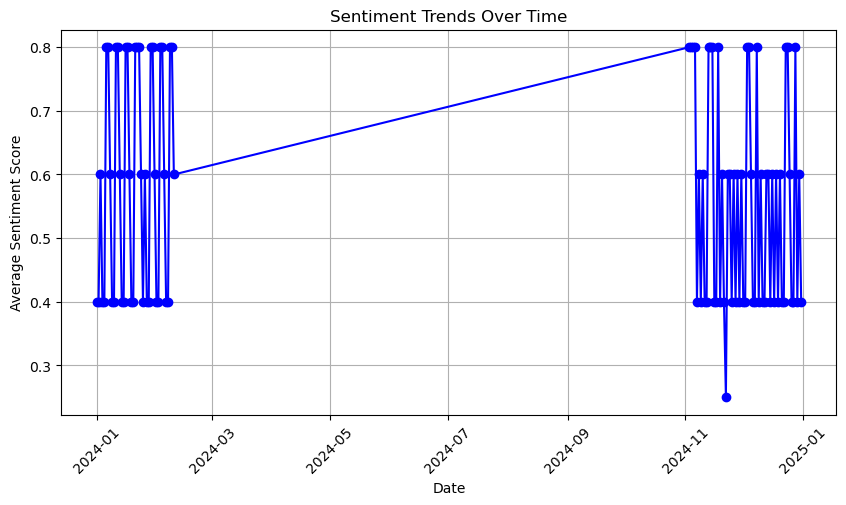

In [27]:
import matplotlib.pyplot as plt

# Aggregate sentiment scores per day
df_daily = df_train.groupby(df_train['timestamp'].dt.date)['sentiment'].mean()

# Plot the sentiment trend over time
plt.figure(figsize=(10,5))
plt.plot(df_daily.index, df_daily.values, marker='o', linestyle='-', color='b')
plt.xlabel("Date")
plt.ylabel("Average Sentiment Score")
plt.title("Sentiment Trends Over Time")
plt.xticks(rotation=45)
plt.grid()
plt.show()

# Timestamp values are improper

In [29]:
broken_index = df_train[df_train['timestamp'] < df_train['timestamp'].shift()].index
broken_index

Index([295], dtype='int64')

In [31]:
df_train.loc[295:, 'timestamp'] = df_train.loc[295:, 'timestamp'].apply(lambda x: x.replace(year=2025) if x.year == 2024 else x)

# Timestamp has been corrected

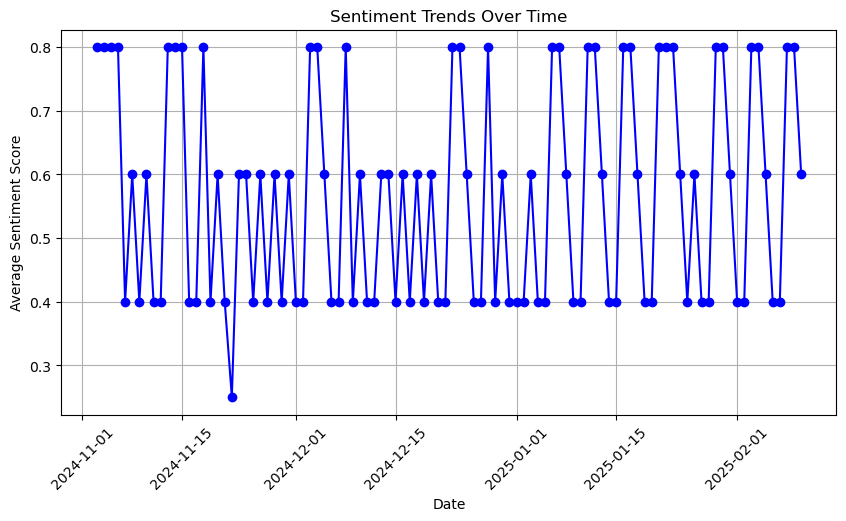

In [42]:
# Aggregate sentiment scores per day
df_daily = df_train.groupby(df_train['timestamp'].dt.date)['sentiment'].mean()

# Plot the sentiment trend over time
plt.figure(figsize=(10,5))
plt.plot(df_daily.index, df_daily.values, marker='o', linestyle='-', color='b')
plt.xlabel("Date")
plt.ylabel("Average Sentiment Score")
plt.title("Sentiment Trends Over Time")
plt.xticks(rotation=45)
plt.grid()
plt.show()

# Trend of average sentiment scores for each candidate

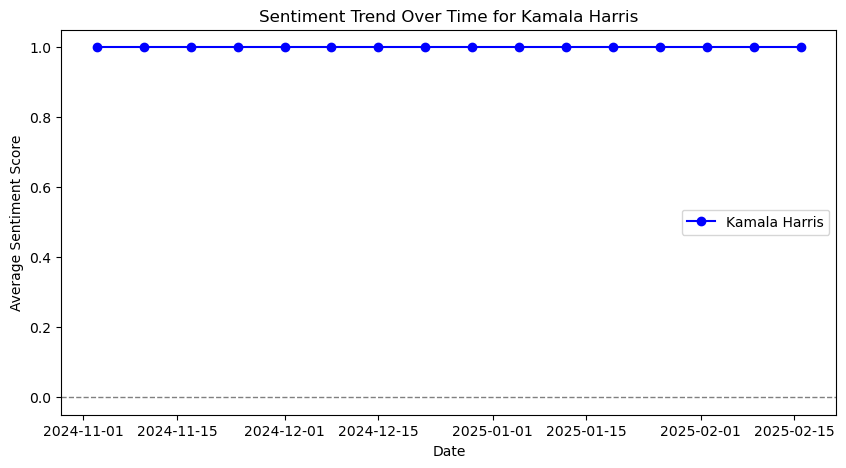

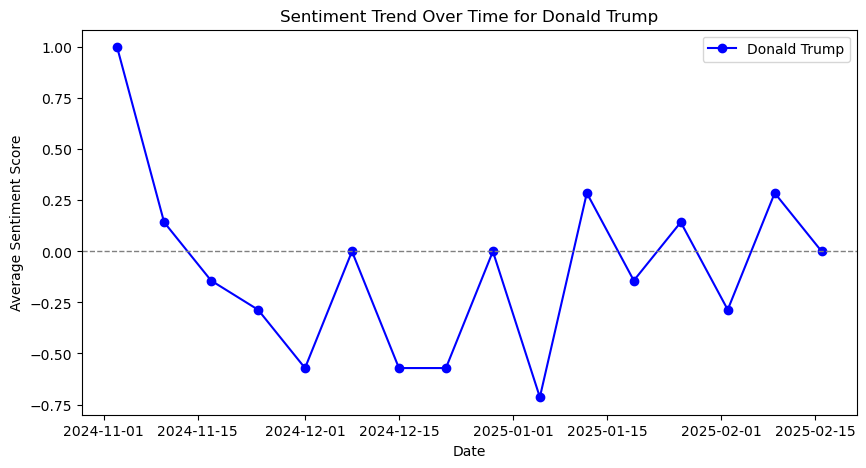

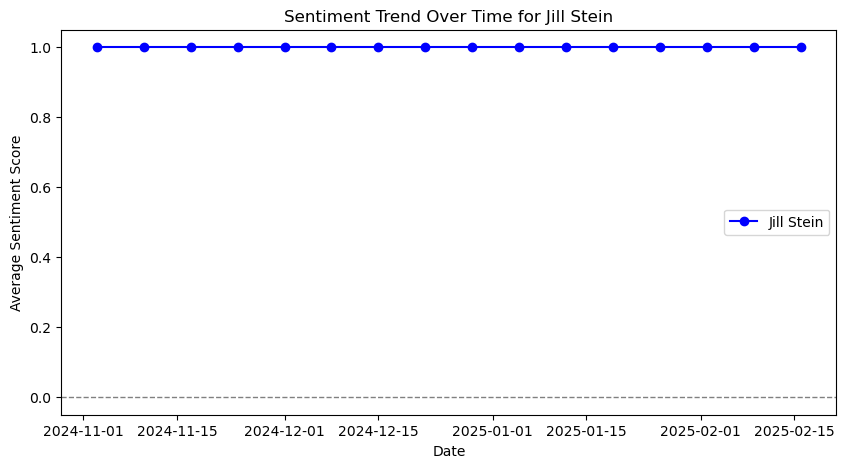

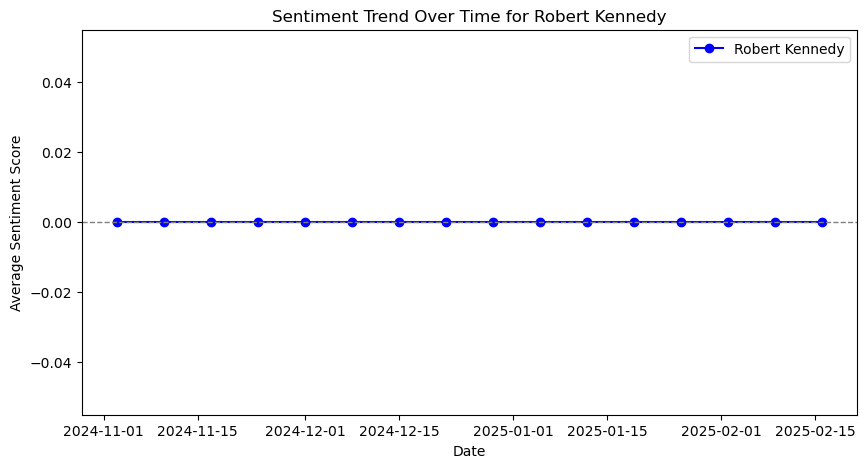

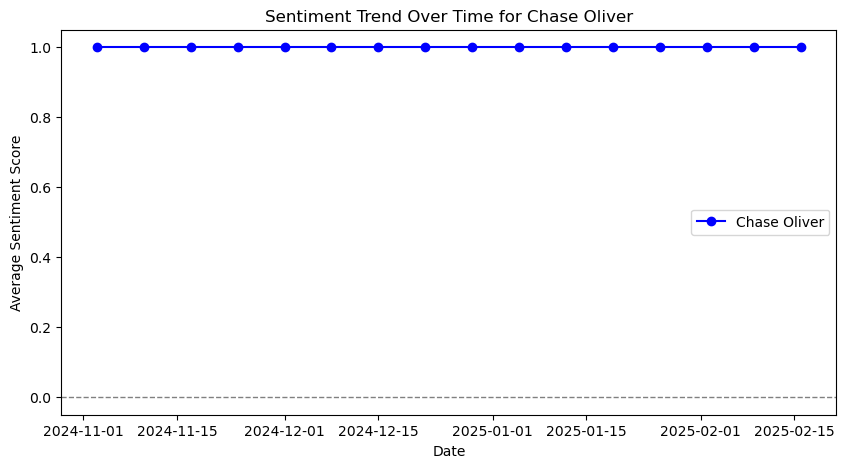

In [34]:
import matplotlib.pyplot as plt  
import pandas as pd  

# Ensure timestamp is in datetime format
df_train['timestamp'] = pd.to_datetime(df_train['timestamp'])

# Get unique candidates
candidates = df_train['candidate'].unique()

# Plot sentiment trends for each candidate
for candidate in candidates:
    plt.figure(figsize=(10, 5))
    
    # Filter data for the candidate
    candidate_df = df_train[df_train['candidate'] == candidate]
    
    # Resample by week and take the mean sentiment score
    sentiment_trend = candidate_df.set_index('timestamp')['sentiment'].resample('W').mean()
    
    # Plot
    plt.plot(sentiment_trend, marker='o', linestyle='-', label=candidate, color='b')
    
    # Labels and title
    plt.xlabel('Date')
    plt.ylabel('Average Sentiment Score')
    plt.title(f'Sentiment Trend Over Time for {candidate}')
    plt.axhline(0, color='gray', linestyle='--', linewidth=1)  # Reference line at 0
    plt.legend()
    
    # Show graph
    plt.show()

In [35]:
df_train['candidate'].value_counts()

candidate
Kamala Harris     100
Donald Trump      100
Jill Stein        100
Robert Kennedy    100
Chase Oliver       99
Name: count, dtype: int64

In [36]:
kamala_df = df_train[df_train['candidate'] == 'Kamala Harris']
print(kamala_df['sentiment'].value_counts())

sentiment
1.0    100
Name: count, dtype: int64


In [37]:
trump_df = df_train[df_train['candidate'] == 'Donald Trump']
print(trump_df['sentiment'].value_counts())

sentiment
-1.0    45
 1.0    29
 0.0    26
Name: count, dtype: int64


In [38]:
stein_df = df_train[df_train['candidate'] == 'Jill Stein']
print(stein_df['sentiment'].value_counts())

sentiment
1.0    100
Name: count, dtype: int64


In [41]:
kennedy_df = df_train[df_train['candidate'] == 'Robert Kennedy']
print(kennedy_df['sentiment'].value_counts())

sentiment
0.0    100
Name: count, dtype: int64


In [40]:
oliver_df = df_train[df_train['candidate'] == 'Chase Oliver']
print(oliver_df['sentiment'].value_counts())

sentiment
1.0    99
Name: count, dtype: int64
